<h1>Unit (and intuition) test for Viral Dynamics model from ODE_Dynamics_viral.py</h1>

<p>&nbsp;</p>

<p>Here&#39;s a basic Viral Dynamics model</p>

<p>&nbsp;</p>


In [1]:
import tensorflow as tf
import numpy as np
import tensorflow_probability as tfp
import sys
sys.path.append('..')
import ODE_Dynamics as od

In [16]:
# Equillibrium: (alpha*gamma/beta*c, L/alpha - gamma*mu/beta*c, c*L/alpha*gamma - mu/beta)
# When beta*c*L = alpha*gamma*mu,(L/mu,0,0) is either a saddle point or an asymptotically stable node.
# Otherwise eventually there remain infected cells, virions and uninfected cells in equilibrium.

par=tf.constant(np.array([[5E3,0.01,5E-7,0.5,20,10]], dtype=np.float32))
mod = od.ViralDynamics(par)
V0 = 1E4
X0 = 1E6
Y0 = 1E4
init_state=tf.constant(np.array([[V0,X0,Y0]], dtype=np.float32))
init_time=tf.constant(0.0)
soln_times=tf.constant(np.linspace(0.0,50.0,num=500,dtype=np.float32))

In [17]:
dp = tfp.math.ode.DormandPrince()
results = dp.solve(mod.RHS, init_time, init_state, solution_times=soln_times)
print(results.diagnostics)

_DopriDiagnostics(num_ode_fn_evaluations=<tf.Tensor: shape=(), dtype=int32, numpy=1602>, num_jacobian_evaluations=<tf.Tensor: shape=(), dtype=int32, numpy=0>, num_matrix_factorizations=<tf.Tensor: shape=(), dtype=int32, numpy=0>, status=<tf.Tensor: shape=(), dtype=int32, numpy=0>)


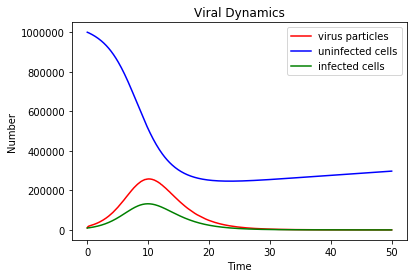

In [18]:
import matplotlib.pyplot as plt
t = results.times ; v = results.states[:,0,0] ; x = results.states[:,0,1] ; y = results.states[:,0,2]
fig1 = plt.figure()
plt.plot(t, v,"r-", t, x, "b-", t, y, "g-")
plt.legend(['virus particles','uninfected cells','infected cells'],loc = 'upper right')
plt.xlabel('Time')
plt.ylabel('Number')
plt.title("Viral Dynamics")
plt.savefig('single_viral_dynamic.png', dpi=300, bbox_inches='tight')

Integrating "backwards" gives garbage, because the set of states corresponding to an initial state [0,1] is measure-zero:

In [109]:
init_time = 100
soln_times = np.linspace(102.0, 0.0, 52)
soln_times = tf.constant(soln_times)
init_state = np.array([[v.numpy()[49], x.numpy()[49], y.numpy()[49]]])
init_state = tf.constant(init_state)
results2 = dp.solve(mod.RHS, init_time, init_state, solution_times=soln_times)

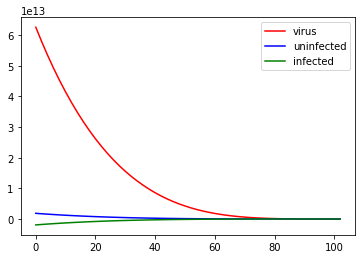

In [110]:
fig2 = plt.figure()
t2 = results2.times ; v2 = results2.states[:,0,0] ; x2 = results2.states[:,0,1] ; y2 = results2.states[:,0,2]
plt.plot(t2, v2,"r-", t2, x2, "b-", t2, y2, "g-")
plt.legend(['virus','uninfected','infected'])

_DopriDiagnostics(num_ode_fn_evaluations=<tf.Tensor: shape=(), dtype=int32, numpy=1596>, num_jacobian_evaluations=<tf.Tensor: shape=(), dtype=int32, numpy=0>, num_matrix_factorizations=<tf.Tensor: shape=(), dtype=int32, numpy=0>, status=<tf.Tensor: shape=(), dtype=int32, numpy=0>)
_DopriDiagnostics(num_ode_fn_evaluations=<tf.Tensor: shape=(), dtype=int32, numpy=1602>, num_jacobian_evaluations=<tf.Tensor: shape=(), dtype=int32, numpy=0>, num_matrix_factorizations=<tf.Tensor: shape=(), dtype=int32, numpy=0>, status=<tf.Tensor: shape=(), dtype=int32, numpy=0>)
_DopriDiagnostics(num_ode_fn_evaluations=<tf.Tensor: shape=(), dtype=int32, numpy=1602>, num_jacobian_evaluations=<tf.Tensor: shape=(), dtype=int32, numpy=0>, num_matrix_factorizations=<tf.Tensor: shape=(), dtype=int32, numpy=0>, status=<tf.Tensor: shape=(), dtype=int32, numpy=0>)
_DopriDiagnostics(num_ode_fn_evaluations=<tf.Tensor: shape=(), dtype=int32, numpy=1590>, num_jacobian_evaluations=<tf.Tensor: shape=(), dtype=int32, numpy

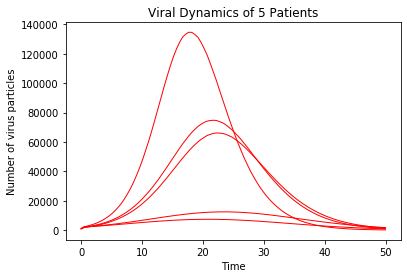

In [108]:
# Simulate several individuals, each with different viral dynamics parameters
import matplotlib.pyplot as plt
fig = plt.figure()
plt.xlabel('Time')
plt.ylabel('Number of virus particles')
plt.title("Viral Dynamics of 5 Patients")
sample_size = 5
index = 1
mu_b, sigma_b = 5, 1

while index <= sample_size:
    beta = np.random.normal(mu_b, sigma_b, 1)   #"rate at which virus infects host cells"
    L = 0.0025/beta
    par=tf.constant(np.array([[L,0.01,beta*1E-7,0.5,20,10]], dtype=np.float32))
    mod = od.ViralDynamics(par)
    V0 = np.random.normal(1E3, 1E2, 1)
    X0 = 1E6
    Y0 = V0
    init_state=tf.constant(np.array([[V0,X0,Y0]], dtype=np.float32))
    init_time=tf.constant(0.0)
    soln_times=tf.constant(np.linspace(0.0,50.0,num=100,dtype=np.float32))
    
    dp = tfp.math.ode.DormandPrince()
    results = dp.solve(mod.RHS, init_time, init_state, solution_times=soln_times)
    print(results.diagnostics)
    
    t = results.times ; v = results.states[:,0,0] ;
    plt.plot(t, v,"r-",linewidth=1)
    
    index +=1
    
plt.savefig('multiple_viral_dynamic_5.png', dpi=300, bbox_inches='tight')

In [5]:
# Find viral load threshold: 25% of mean maximum load
beta = 5
L = 0.0025/beta
par=tf.constant(np.array([[L,0.01,beta*1E-7,0.5,20,10]], dtype=np.float32))
mod = od.ViralDynamics(par)
V0 = np.random.normal(1E3, 1E2, 1)
X0 = 1E6
Y0 = V0
init_state=tf.constant(np.array([[V0,X0,Y0]], dtype=np.float32))
init_time=tf.constant(0.0)
soln_times=tf.constant(np.linspace(0.0,200,num=200,dtype=np.float32))
dp = tfp.math.ode.DormandPrince()
results = dp.solve(mod.RHS, init_time, init_state, solution_times=soln_times)
v_threshold = max(results.states[:,0,0].numpy()) * 0.5
print(v_threshold)

85153.203125
